In [11]:
# =========================================================
# QUESTION 1: Use yfinance to Extract Tesla Stock Data
# =========================================================

# Import libraries
import yfinance as yf
import pandas as pd

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Use the history() method to extract all available stock data
tesla_data = tesla.history(period="max")

# Reset the index and display the first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [12]:
# =========================================================
# QUESTION 2: Extract Tesla Revenue Data
# =========================================================

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Access the income statement (more accurate than .financials)
income_stmt = tesla.income_stmt

# Find the row name that contains 'Total Revenue'
row_name = None
for name in income_stmt.index:
    if "Revenue" in name and "Total" in name:
        row_name = name
        break

if row_name is None:
    raise Exception("No 'Total Revenue' found in Tesla's income statement.")

# Extract the revenue data and clean it
tesla_revenue = income_stmt.loc[row_name].reset_index()
tesla_revenue.columns = ["Date", "Revenue"]

# Convert date to string and revenue to billions
tesla_revenue["Date"] = tesla_revenue["Date"].astype(str)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float) / 1e9

# Display the last five rows of the dataframe
tesla_revenue.tail()


,Date,Revenue
0,2024-12-31,97.690
1,2023-12-31,96.773
2,2022-12-31,81.462
3,2021-12-31,53.823
4,2020-12-31,NaN


In [13]:
# =========================================================
# QUESTION 3: Extract GameStop Stock Data using yfinance
# =========================================================

# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Extract the historical stock data (maximum available period)
gme_data = gme.history(period="max")

# Reset the index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [14]:
# =========================================================
# QUESTION 4: Extract GameStop Revenue Data 
# =========================================================

# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Get the income statement from Yahoo Finance
income_stmt = gme.income_stmt

# Identify the row that contains "Total Revenue"
row_name = None
for name in income_stmt.index:
    if "Revenue" in name and "Total" in name:
        row_name = name
        break

if row_name is None:
    raise Exception("No 'Total Revenue' row found in GameStop income statement.")

# Build the DataFrame
gme_revenue = income_stmt.loc[row_name].reset_index()
gme_revenue.columns = ["Date", "Revenue"]

# Clean and format values
gme_revenue["Date"] = gme_revenue["Date"].astype(str)
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float) / 1e9  # billions USD

# Display detected row and last five entries
print(f"Detected row: {row_name}")
print(gme_revenue.tail())


Detected row: Total Revenue
         Date  Revenue
0  2025-01-31   3.8230
1  2024-01-31   5.2728
2  2023-01-31   5.9272
3  2022-01-31   6.0107
4  2021-01-31      NaN


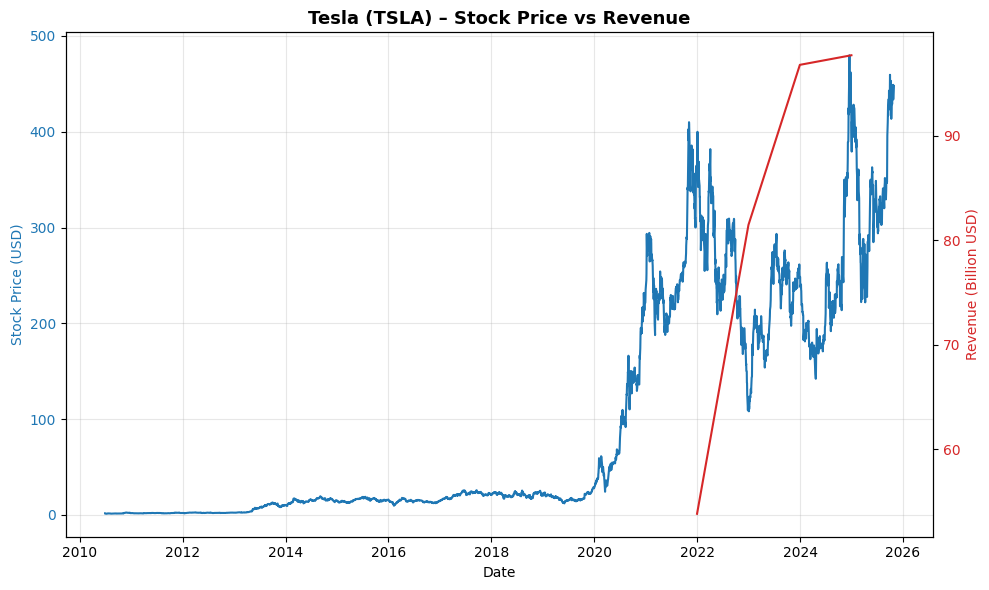

In [15]:
# =========================================================
# QUESTION 5: Plot Tesla Stock Data (fixed version)
# =========================================================

import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    """
    Plot stock closing price and revenue over time.

    Parameters:
    - stock_data: DataFrame with 'Date' and 'Close' columns (from yfinance)
    - revenue_data: DataFrame with 'Date' and 'Revenue' columns (from income statement)
    - stock_name: str, company name for plot title
    """
    # --- Ensure correct date formats ---
    stock_data["Date"] = pd.to_datetime(stock_data["Date"]).dt.tz_localize(None)
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"], errors="coerce")

    # --- Create the figure ---
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # --- Plot Stock Price (left axis) ---
    ax1.plot(stock_data["Date"], stock_data["Close"], color="tab:blue", label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")
    ax1.grid(alpha=0.3)

    # --- Plot Revenue (right axis) ---
    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color="tab:red", label="Revenue (Billion USD)")
    ax2.set_ylabel("Revenue (Billion USD)", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # --- Title and layout ---
    plt.title(f"{stock_name} – Stock Price vs Revenue", fontsize=13, weight="bold")
    fig.tight_layout()
    plt.show()


# --- Call the function for Tesla ---
make_graph(tesla_data, tesla_revenue, "Tesla (TSLA)")



=== Question 6: GameStop Stock Data ===


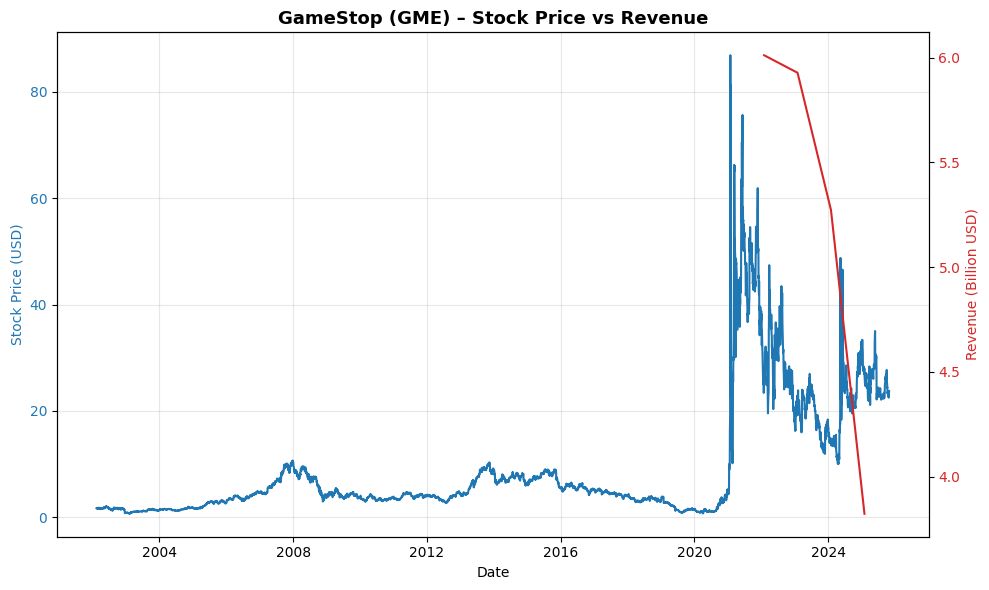

In [16]:
# =========================================================
# QUESTION 6: Plot GameStop Stock Data
# =========================================================

print("\n=== Question 6: GameStop Stock Data ===")

# Generate the chart using the same make_graph() function
make_graph(gme_data, gme_revenue, "GameStop (GME)")
